# APPM 5370 Homework 4

## Soroush Khadem

In [1]:
import numpy as np
from scipy.integrate import odeint
import numpy.random as rnd
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('dark_background')
import math

In [2]:
horiz_scaling = 3 # scale plots to fill page, so must adjust the phase plane plots as well
height = 5

plt.rcParams['figure.figsize'] = [height*horiz_scaling, height]

### Problem 4: Visualizing Attractors in Competitive Neural Networks

In [3]:
def create_phase_plane(func, time, maxval=1.5):
    u = np.linspace(0,maxval,20)
    w = np.linspace(0,maxval,20)
    U, W = np.meshgrid(u,w)
    x, y = np.zeros(U.shape), np.zeros(W.shape)
    ni, nj = U.shape
    for i in range(ni):
        for j in range(nj):
            yprime = func([U[i,j],W[i,j]],time)
            x[i,j] = yprime[0]
            y[i,j] = yprime[1]/horiz_scaling # since plots are stretched

    return x,y,U,W

In [4]:
def simulate(func, initial_values, time_split=None, with_phase=False, max_time=20, nullclines=None):
    # use ode to solve for traj.
    tvec = np.linspace(0, max_time, 200)

    traj = odeint(func, initial_values, tvec)

    fig = plt.figure()
    plt.plot(traj[:,0],traj[:,1],'c-', linewidth=4) # trajectory
    plt.plot(traj[:,0][0],traj[:,1][0],'co', fillstyle='none', markersize=10, mew=2) # trajectory start
    plt.plot(traj[:,0][-1],traj[:,1][-1],'cx', markersize=20, mew=5) # trajectory end

    legend_text = ['Trajectory', 'Start', 'End']

    if with_phase:
        x,y,U,W = create_phase_plane(func, 0)
        Q = plt.quiver(U,W,x,y,color='r', width=0.002) # phase plane
        legend_text.append('Phase Plane')

        
    plt.grid(True, alpha=0.2)
    plt.title('Full Trajectory')
    plt.xlabel('u1')
    plt.ylabel('u2')
    plt.legend(legend_text)
        
    # new plots
    if time_split is not None:
        # Now, split up the phase plane

        # find where t is first at the split value, since phase plane changes
        t_index = np.argwhere(tvec > time_split)[0][0]

        fig = plt.figure()
        x,y,U,W = create_phase_plane(func, 0)
        Q = plt.quiver(U,W,x,y,color='r', width=0.002) # phase plane
        plt.plot(traj[:,0][:t_index],traj[:,1][:t_index],'c-', linewidth=4) # trajectory
        plt.plot(traj[:,0][:t_index][0],traj[:,1][:t_index][0],'co', fillstyle='none', markersize=10, mew=2) # trajectory start
        plt.plot(traj[:,0][:t_index][-1],traj[:,1][:t_index][-1],'cx', markersize=20, mew=5) # trajectory end

        plt.grid(True, alpha=0.2)
        plt.title('0 < t < %s'%time_split)
        plt.xlabel('u1')
        plt.ylabel('u2')
        plt.legend(['Trajectory', 'Start', 'End', 'Phase Plane'])
        plt.xlim([0,1.5])
        plt.ylim([0,1.5])

        # t > 1
        fig = plt.figure()
        x,y,U,W = create_phase_plane(func, time_split)
        Q = plt.quiver(U,W,x,y,color='r',width=0.002) # phase plane
        plt.plot(traj[:,0][t_index:],traj[:,1][t_index:],'c-', linewidth=4) # trajectory
        plt.plot(traj[:,0][t_index:][0],traj[:,1][t_index:][0],'co', fillstyle='none', markersize=10, mew=2) # trajectory start
        plt.plot(traj[:,0][t_index:][-1],traj[:,1][t_index:][-1],'cx', markersize=20, mew=5) # trajectory end

        plt.grid(True, alpha=0.2)
        plt.title('t > %s'%time_split)
        plt.xlabel('u1')
        plt.ylabel('u2')
        plt.legend(['Trajectory', 'Start', 'End', 'Line Attractor', 'Phase Plane'])
        plt.xlim([0,1.5])
        plt.ylim([0,1.5])

#### Part A

$$ u_1' = 1 - u_1 - u_2 + I_1(t), u_1(0) = \frac{1}{2}, I_1(t) = 1 - H(t-1) $$
$$ u_2' = 1 - u_1 - u_2 + I_2(t), u_2(0) = \frac{1}{2}, I_2(t) = 0 $$

In [5]:
def F(Y, t):
    u1, u2 = Y
    return [1 - u1 - u2 + 1 - np.heaviside(t-1, 1), 1 - u1 - u2]
    

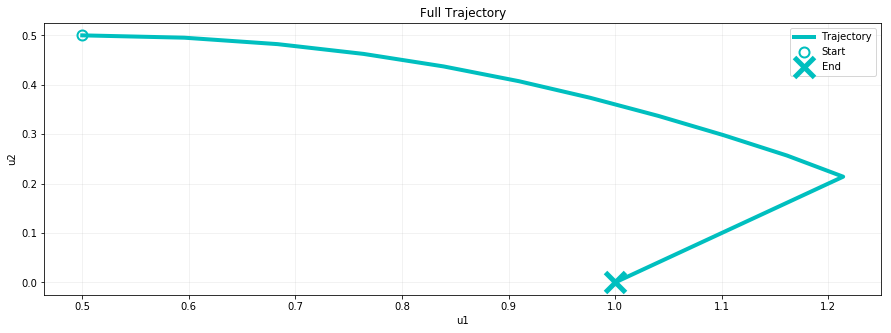

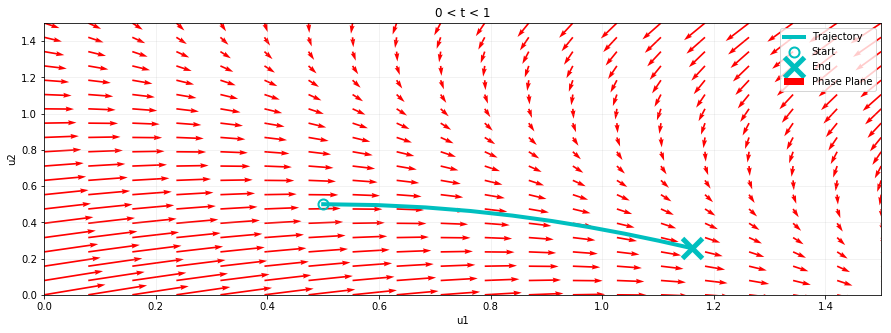

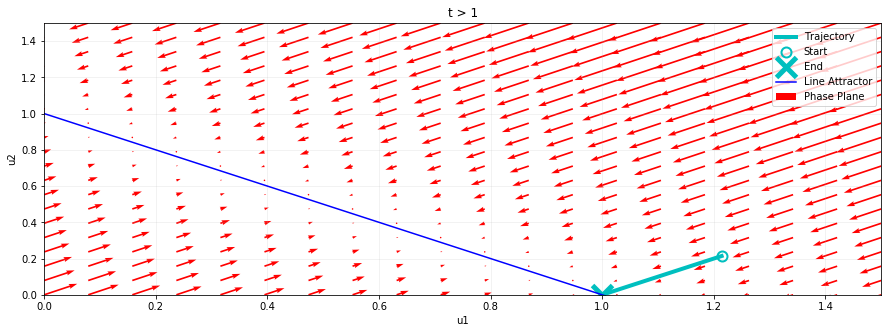

In [6]:
simulate(F, [1/2,1/2], time_split=1)
# add in analytic nullcline
xs = np.linspace(0, 2, 100)
ys = 1 - xs
plt.plot(xs, ys, 'b') # nullcline
plt.legend(['Trajectory', 'Start', 'End', 'Line Attractor', 'Phase Plane'])

In the long term, $u_1$ approaches 1, while $u_2$ approaches 0, which exactly matches the analytic solution when setting $I_0$ to 0

#### Part B

$$ u_1' = 1 - u_1 - u_2 + I_1(t), u_1(0) = \frac{1}{2}, I_1(t) = 1 - H(t-1) $$
$$ u_2' = 1 - u_1 - u_2 + I_2(t), u_2(0) = \frac{1}{2}, I_2(t) = 1 - H(t-1) $$

In [7]:
def G(Y, t):
    u1, u2 = Y
    return [1 - u1 - u2 + 1 - np.heaviside(t-1, 1), 1 - u1 - u2 + 1 - np.heaviside(t-1, 1)]

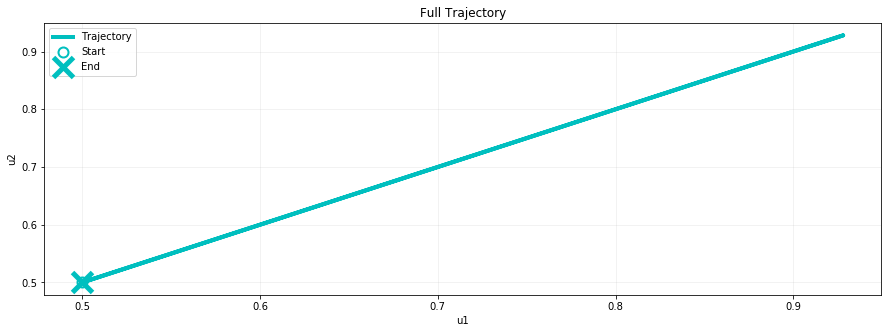

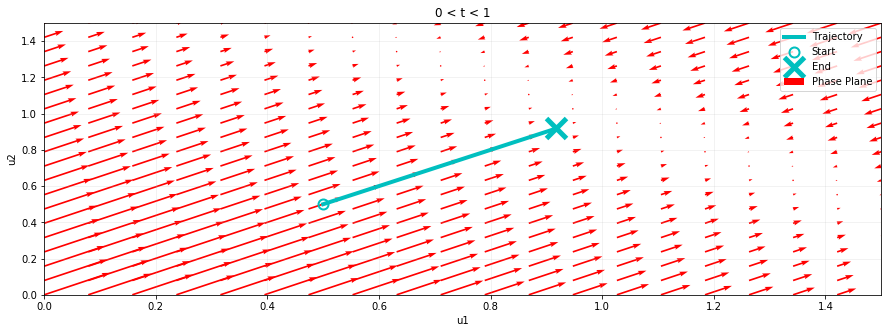

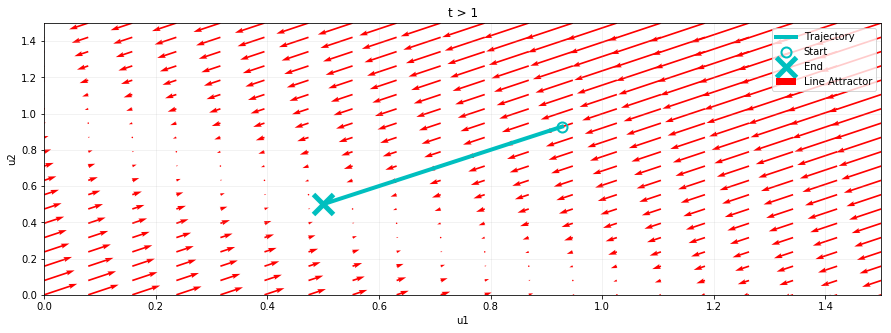

In [8]:
simulate(G, [1/2, 1/2], time_split=1)

Here, there is a linear attractor in both time regimes, leading the trajectory to trend towards one, and then as the input turns off, trends towards the other, eventually settling to $\bar{u_1} = \bar{u_2} = \frac{1}{2}$. This system is inherently different from the first one since neither neuron has a competitive advantage and stay the same throughout time,

#### Part C

Now, 
$$ u_1' = -u_1 + \frac{1}{1 + e^{-\gamma(1-2u_2)}}$$
$$ u_2' = -u_2 + \frac{1}{1 + e^{-\gamma(1-2u_1)}}$$

In [9]:
def H(Y, t):
    u1, u2 = Y
    return [-u1 + 1/(1+math.exp(-gamma*(1-2*u2))), -u2 + 1/(1+math.exp(-gamma*(1-2*u1)))]

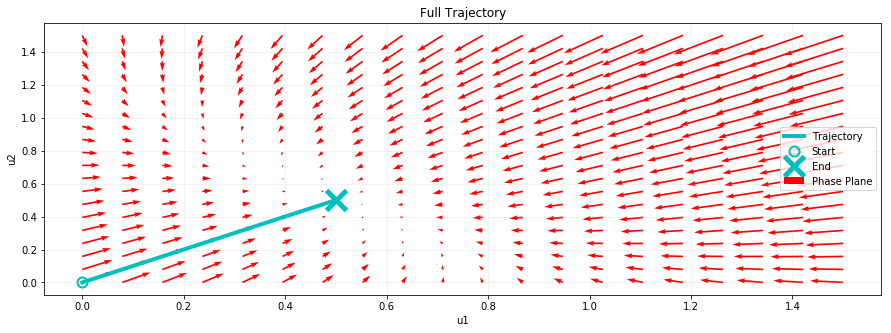

In [10]:
gamma = 1
simulate(H, [0,0], with_phase=True)

When $\gamma$ is equal to 1, the network has a fixed point at $\bar{u_1} = \bar{u_2} = \frac{1}{2}$, and the trajectory gets sucked into it, since it is stable.

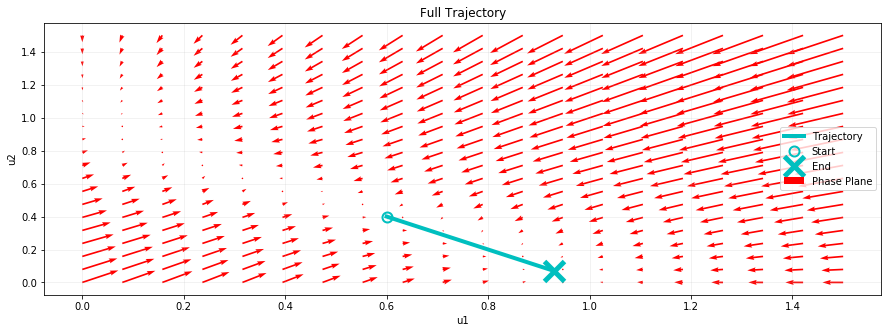

In [11]:
gamma = 3
simulate(H, [3/5,2/5], with_phase=True, max_time=500)

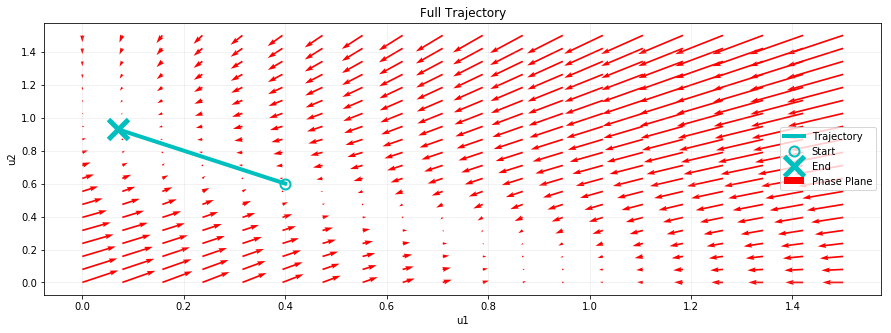

In [12]:
gamma = 3
simulate(H, [2/5,3/5], with_phase=True)

As $\gamma$ went over 2, as predicted analytically, the neural network became competitive, as the neuron with the higher initial firing rate ended with the majority of the activity as $t$ increased, inhibiting the other neuron.